In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* M = Malignant (Cancerous) - Present (M)
* B = Benign (Not Cancerous) - Absent (B)

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os 
import time
warnings.filterwarnings("ignore")
import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import hamming_loss
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from time import perf_counter
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 100

LOADING THE DATASET

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/workspace/dataset/cancer_data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df2 = df.copy()

In [ ]:
# feature names as a list
df.columns       # .columns gives columns names in df

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

> Col: Unnmaded:32 containes NaN value. and COl: id not a important feature to use. So we will drop these columns

In [ ]:
# y includes our labels and x includes our features
y = df.diagnosis                          # Malignant or Benign
list = ['Unnamed: 32','id','diagnosis']
x = df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


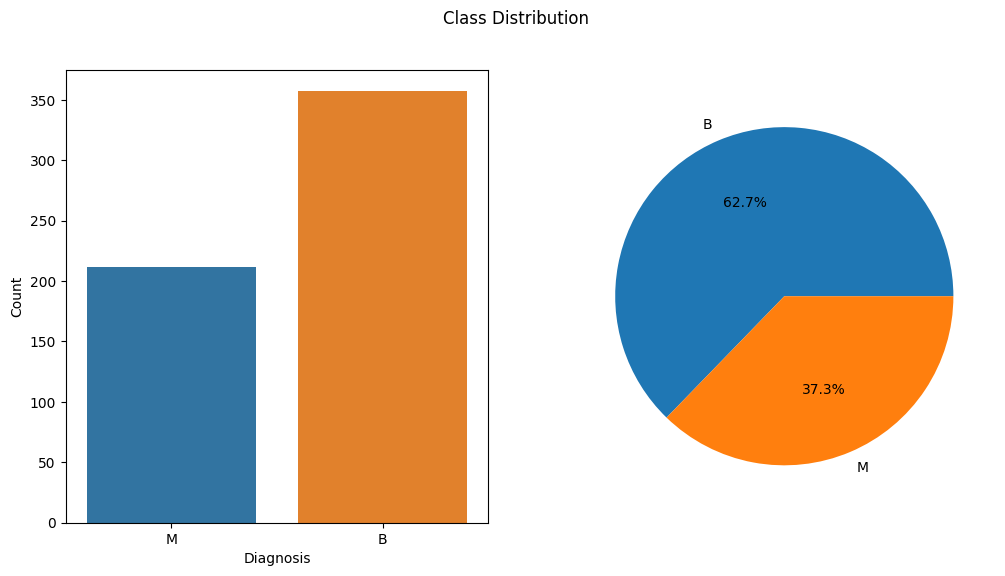

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(x='diagnosis', data=df, ax=axes[0])
plt.pie(df.groupby('diagnosis')['diagnosis'].count(), labels=['B','M'], autopct='%1.1f%%')

fig.suptitle('Class Distribution', fontsize=12)
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.show()

In [ ]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Data Preprocessing

In swarm plot, We will do three part  to make plot very complex appearance

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

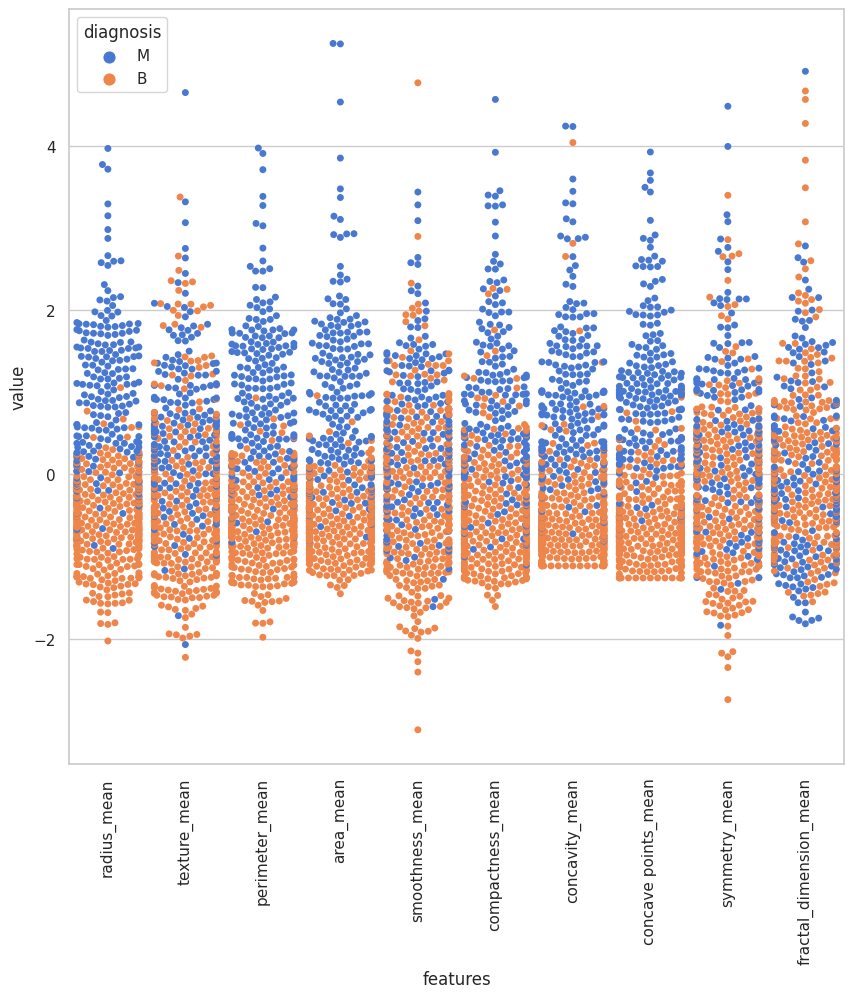

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

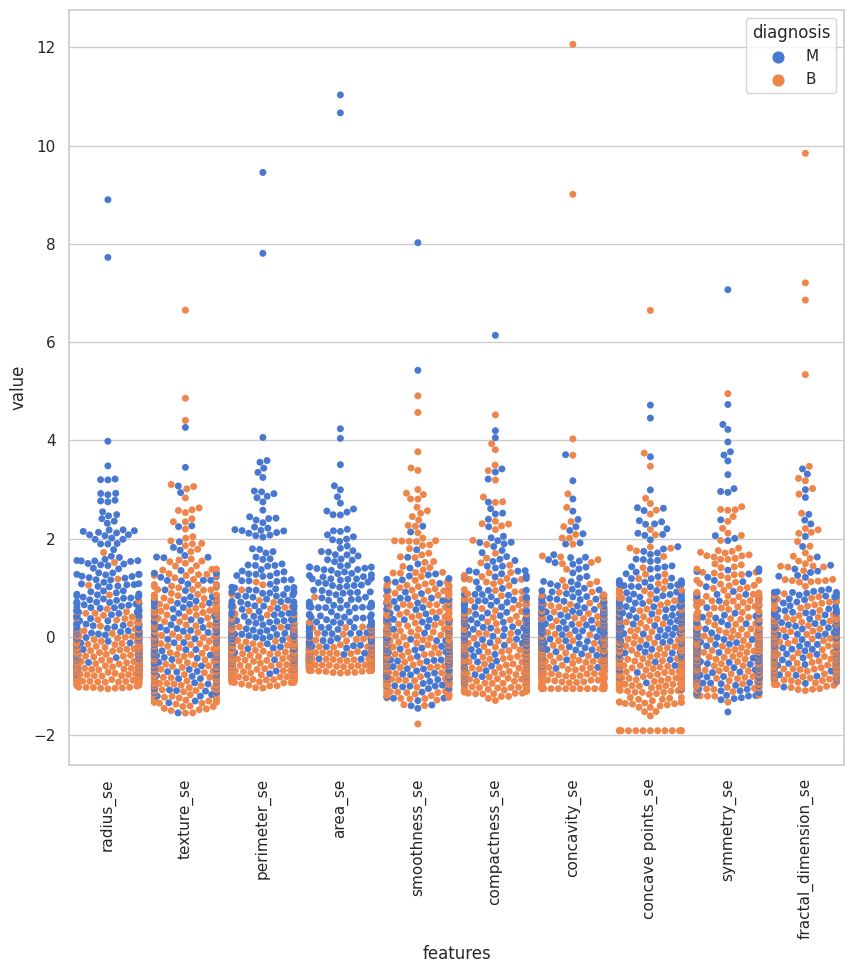

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  15.103642463684082  s


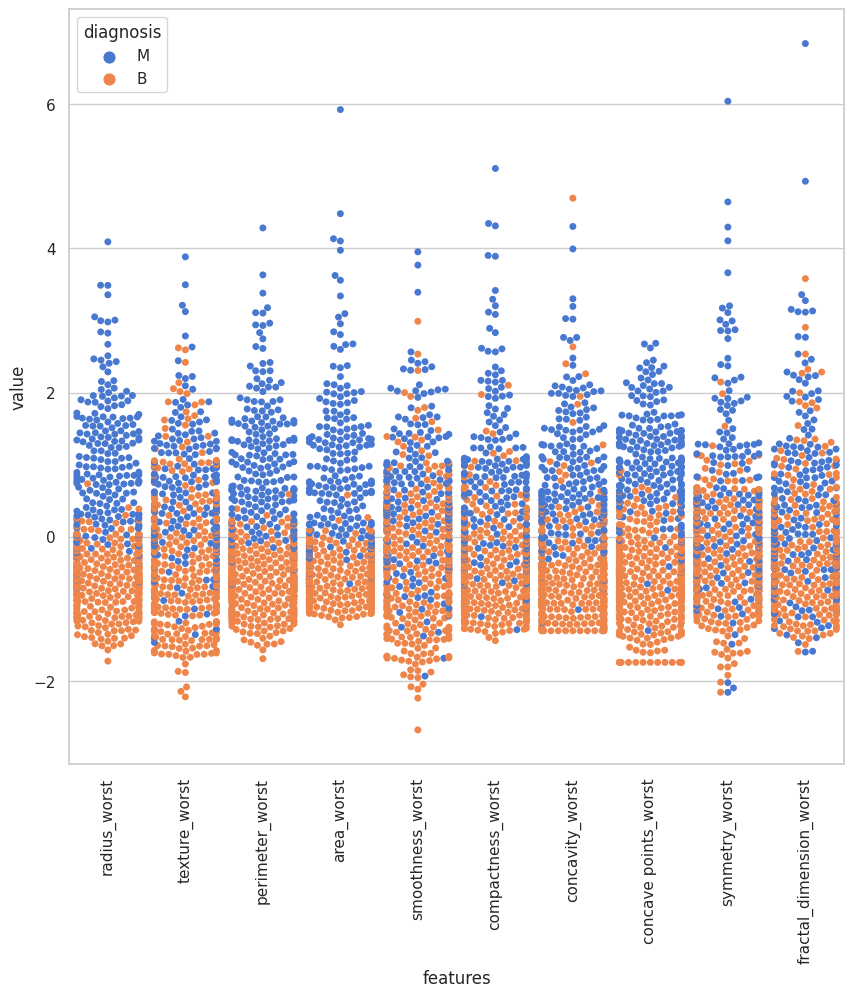

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

They looks cool right. And you can see variance more clear. Let me ask you a question, in these three plots which feature looks like more clear in terms of classification. In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

What if we want to observe all correlation between features? Yes, you are right. The answer is heatmap that is old but powerful plot method.

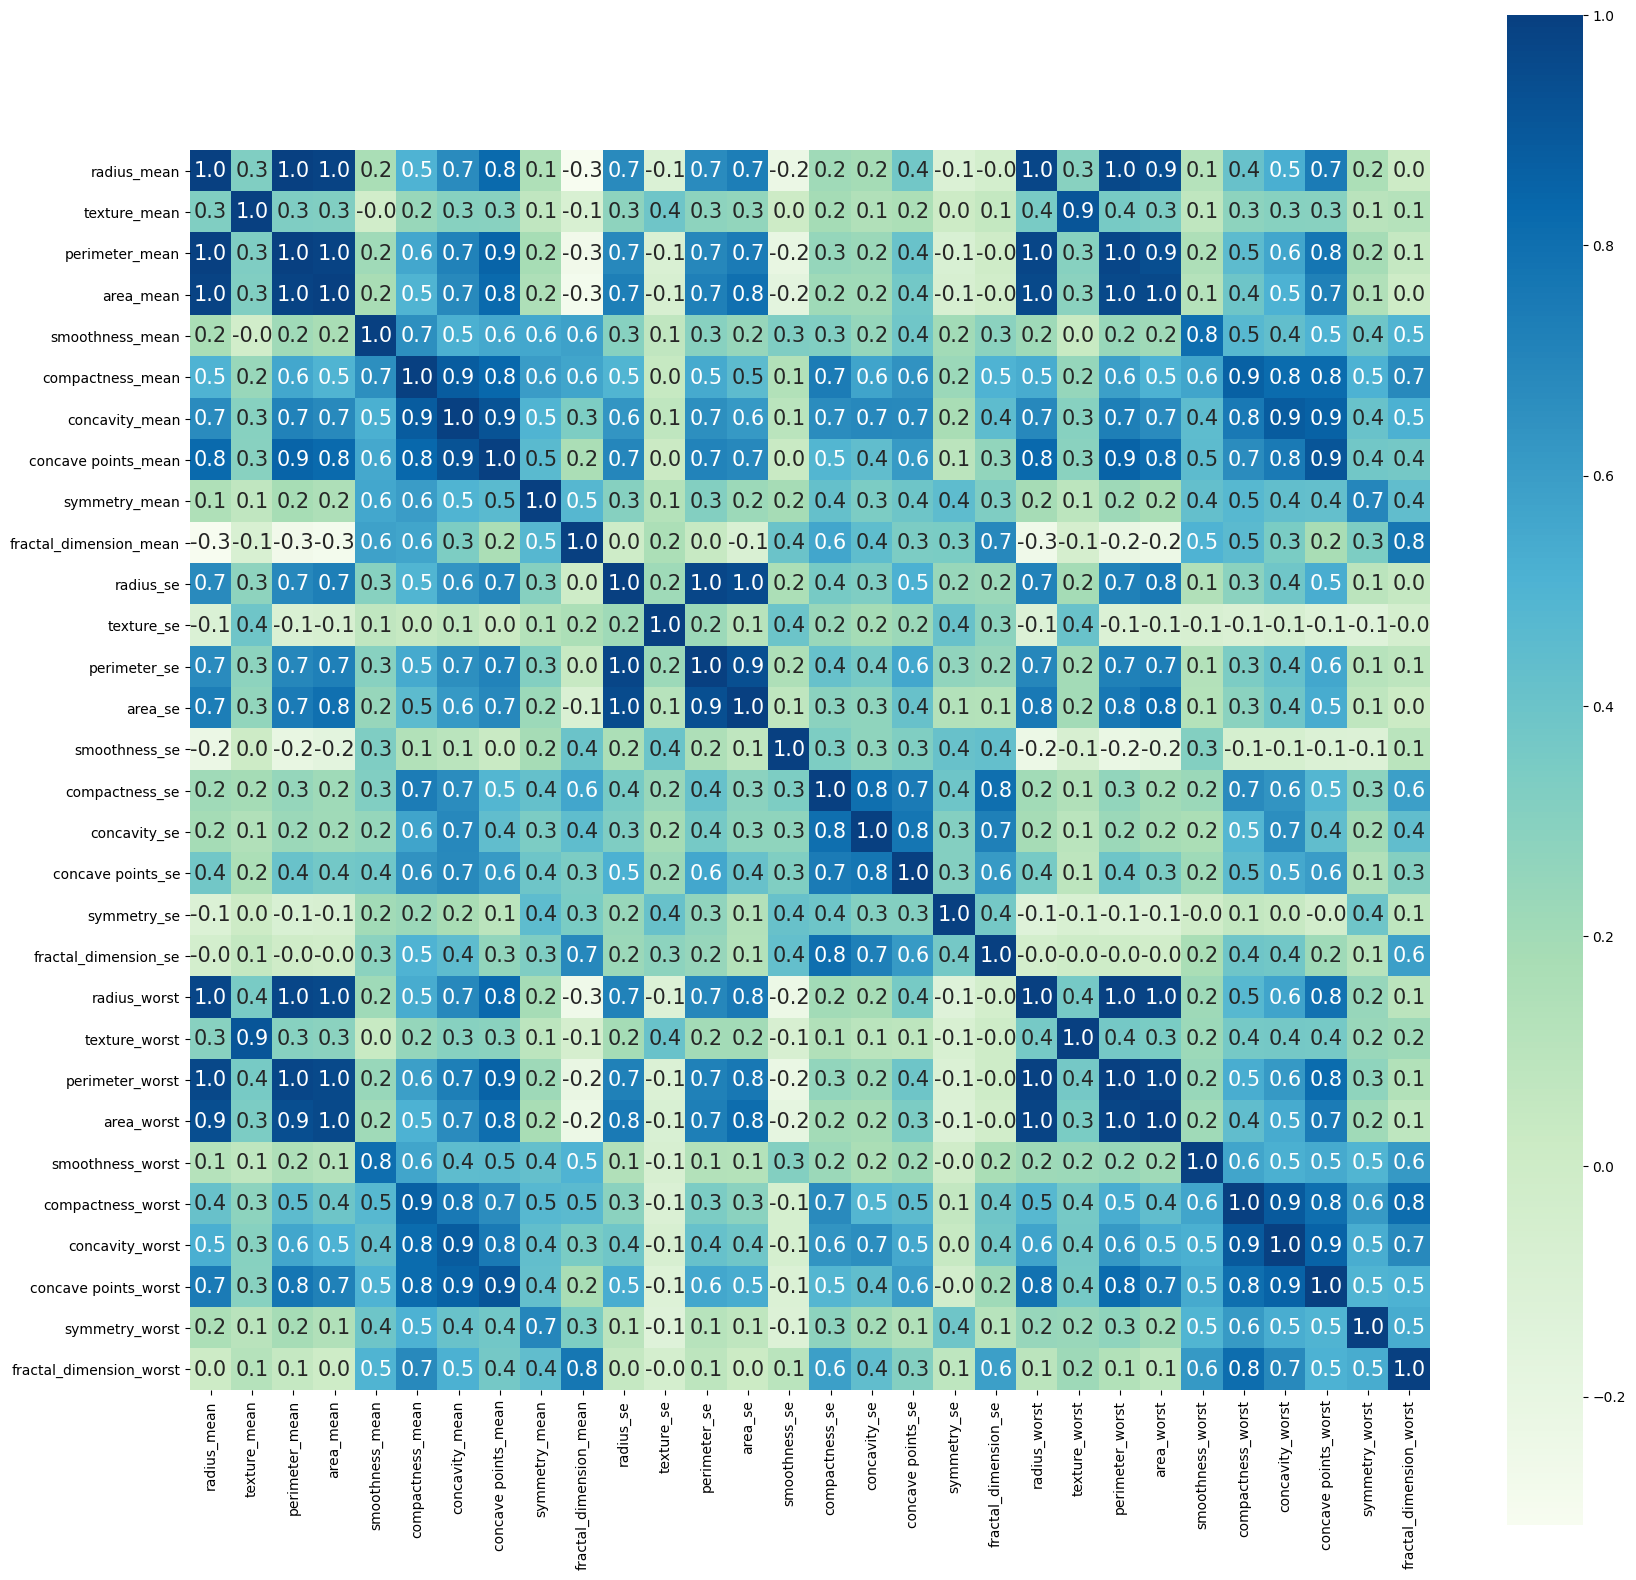

In [ ]:
corr = x.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='GnBu')
plt.show()

Well, finaly we are in the pub and lets choose our drinks at feature selection part while using heatmap(correlation matrix).

As you see in correlation plot, there are some correlated variables in the dataset.

1. radius_mean, perimeter_mean and area_mean are correlated -> i will use area_mean
2. compactness_mean, concavity_mean and concave points_mean are correlated -> will use concavity_mean
3. texture_mean and texture_worst are correlated -> i wil use texture_mean
4. radius_se, perimeter_se and area_se are correlated -> i will use area_se
5. radius_worst, perimeter_worst and area_worst are correlated -> i will use area_worst
6. compactness_se, concavity_se and concave points_se are correlated -> i will use concavity_se
7. compactness_worst, concavity_worst and concave points_worst are correlated -> i will use concavity_worst
8. area_worst and area_mean are correlated -> i will use area_mean
9. concavity_mean and concavity_worst are correlated -> i will use concavity_worst

In [ ]:
dropList = ['radius_mean', 'perimeter_mean', 'compactness_mean', 'concave points_mean', 'radius_worst','perimeter_worst', 'texture_worst','perimeter_se','radius_se','compactness_se','concave points_se','compactness_worst','concave points_worst', 'area_worst', 'concavity_mean']
dataProcessed = x.drop(dropList, axis=1)

In [ ]:
dataProcessed = x

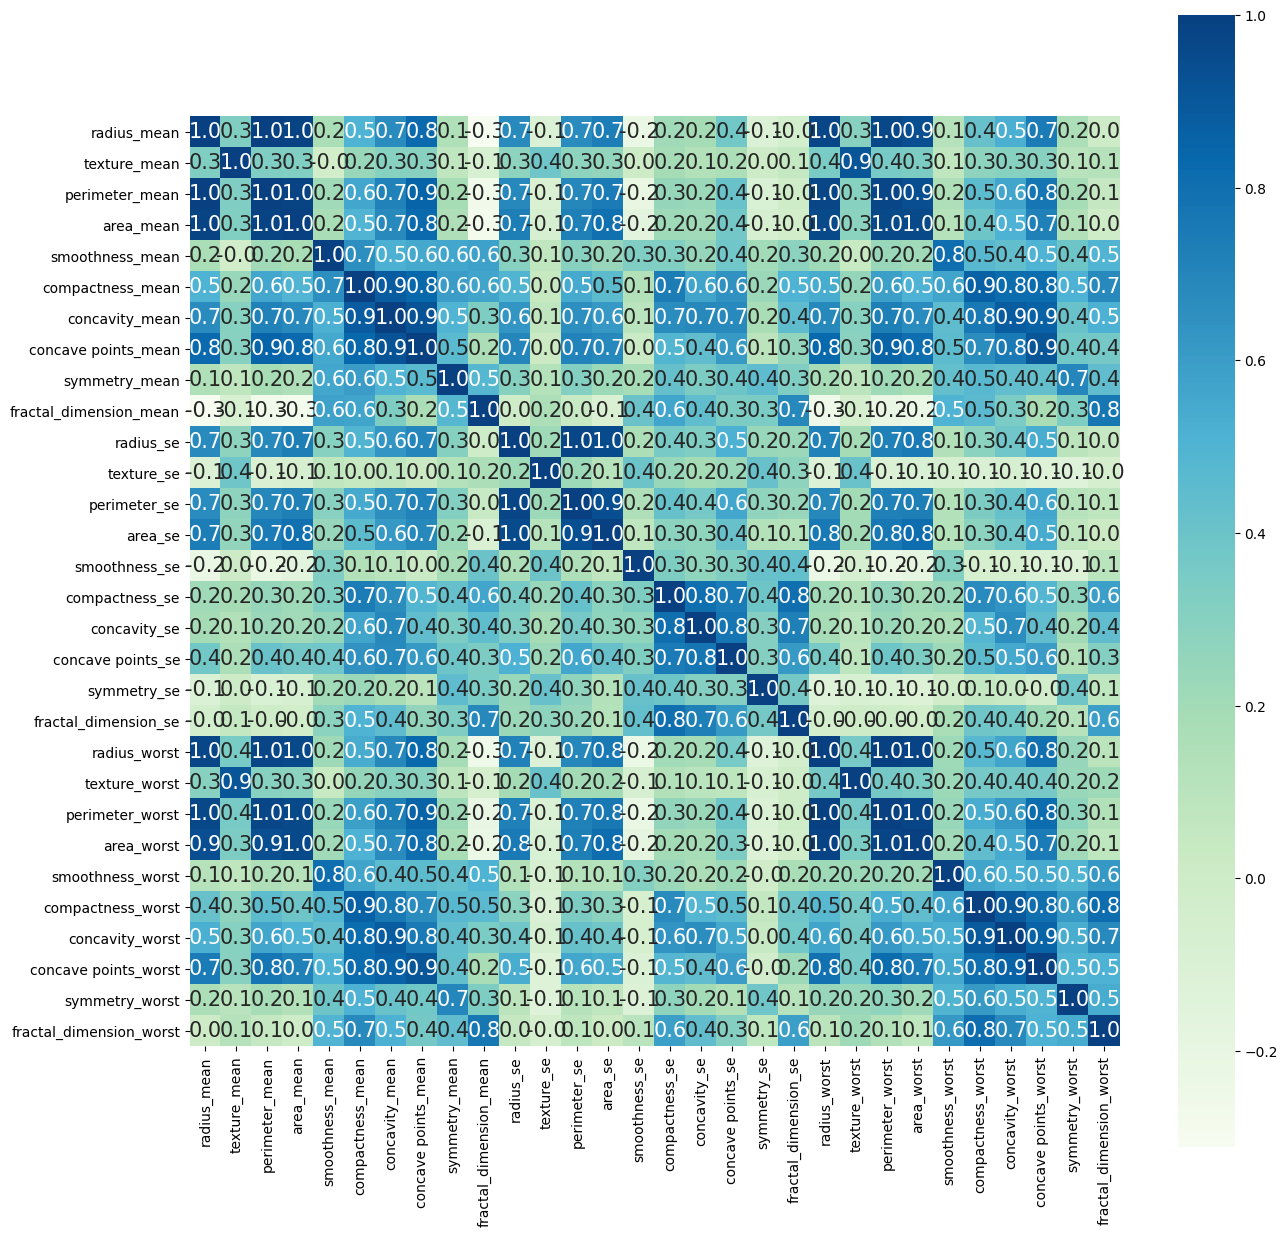

In [ ]:
corr = dataProcessed.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='GnBu')
plt.show()

After dropping correlated features, we were able to reduce features into 15. As discussed earlier, there are some outliers in the dataset and Logistic Regression is sensitive to outliers. Therefore, let's treat outliers. There are many different ways to treat outliers, since this dataset is smaller I will use the data imputation technique

In [ ]:
dataProcessed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
def outlierLimit(column):
    q1, q3 = np.nanpercentile(column, [25, 75])
    iqr = q3 - q1
    
    upLimit = q3 + 1.5 * iqr
    loLimit = q1 - 1.5 * iqr
    
    return upLimit, loLimit

In [ ]:
for column in dataProcessed.columns:
    if dataProcessed[column].dtype != 'object':
        upLimit, loLimit = outlierLimit(dataProcessed[column])
        dataProcessed[column] = np.where((dataProcessed[column] > upLimit) | (dataProcessed[column] < loLimit), np.nan, dataProcessed[column])

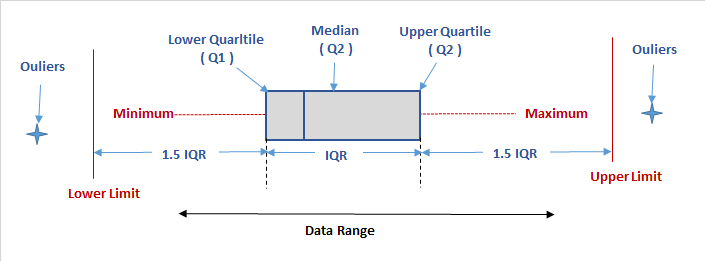

Using the above function, we are selecting outliers that above and below the upper limit and lower limit. Then change into missing value if vale is above or lower the limit. For more info read this https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/

In [ ]:
dataProcessed.isnull().sum()

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

Now you can see there are missing values in our dataset. Like I told you earlier, now we can treat the missing values using k-Nearest Neighbors

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
dataProcessed.iloc[:, :] = imputer.fit_transform(dataProcessed)

In [ ]:
dataProcessed.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataProcessed.shape

(569, 30)

In [ ]:
dataProcessed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.15100,0.166925,0.14710,0.241900,0.078710,0.666975,0.9053,4.80225,80.765,0.006399,0.049040,0.05373,0.01587,0.030030,0.006193,25.38,17.33,184.60,1567.00,0.1622,0.34305,0.7119,0.2654,0.27785,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.181200,0.056670,0.543500,0.7339,3.39800,74.080,0.005225,0.013080,0.01860,0.01340,0.013890,0.003532,24.99,23.41,158.80,1797.75,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.206900,0.059990,0.745600,0.7869,4.58500,80.765,0.006150,0.040060,0.03832,0.02058,0.022500,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.11098,0.16445,0.241400,0.10520,0.181225,0.063458,0.495600,1.1560,3.44500,27.230,0.009110,0.031955,0.05661,0.01867,0.023817,0.004020,14.91,26.50,98.87,567.70,0.1443,0.41070,0.6869,0.2575,0.34525,0.08888
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.180900,0.058830,0.757200,0.7813,5.43800,78.495,0.011490,0.024610,0.05688,0.01885,0.017560,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


#Model Training




**OverSampling using SMOTE algorithm**

In [ ]:
sm = SMOTE(random_state = 2)
X__res, y__res = sm.fit_sample(dataProcessed, y.ravel())

In [ ]:
X__res.shape

(714, 30)

**UnderSampling using NearMiss algorithm**

The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.

In [ ]:
# apply near miss
nr = NearMiss()  
X_miss, y_miss = nr.fit_sample(dataProcessed, y.ravel())

In [ ]:
X_miss.shape

(424, 30)

# Plot

In [ ]:
# Create DataFrame
df_x = pd.DataFrame(X__res)
df_y = pd.DataFrame(y__res)
# Rename the columns of df_y
df_y = df_y.rename(columns = {0: 'diagnosis'}, inplace = False)
# applying concat with axes
# join = 'inner'
df_new = pd.concat([df_x, df_y], axis=1, join='inner')
df_new.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.15100,0.166925,0.14710,0.241900,0.078710,0.666975,0.9053,4.80225,80.765,0.006399,0.049040,0.05373,0.01587,0.030030,0.006193,25.38,17.33,184.60,1567.00,0.1622,0.34305,0.7119,0.2654,0.27785,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.181200,0.056670,0.543500,0.7339,3.39800,74.080,0.005225,0.013080,0.01860,0.01340,0.013890,0.003532,24.99,23.41,158.80,1797.75,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.206900,0.059990,0.745600,0.7869,4.58500,80.765,0.006150,0.040060,0.03832,0.02058,0.022500,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,M
3,11.42,20.38,77.58,386.1,0.11098,0.16445,0.241400,0.10520,0.181225,0.063458,0.495600,1.1560,3.44500,27.230,0.009110,0.031955,0.05661,0.01867,0.023817,0.004020,14.91,26.50,98.87,567.70,0.1443,0.41070,0.6869,0.2575,0.34525,0.08888,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.180900,0.058830,0.757200,0.7813,5.43800,78.495,0.011490,0.024610,0.05688,0.01885,0.017560,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,M


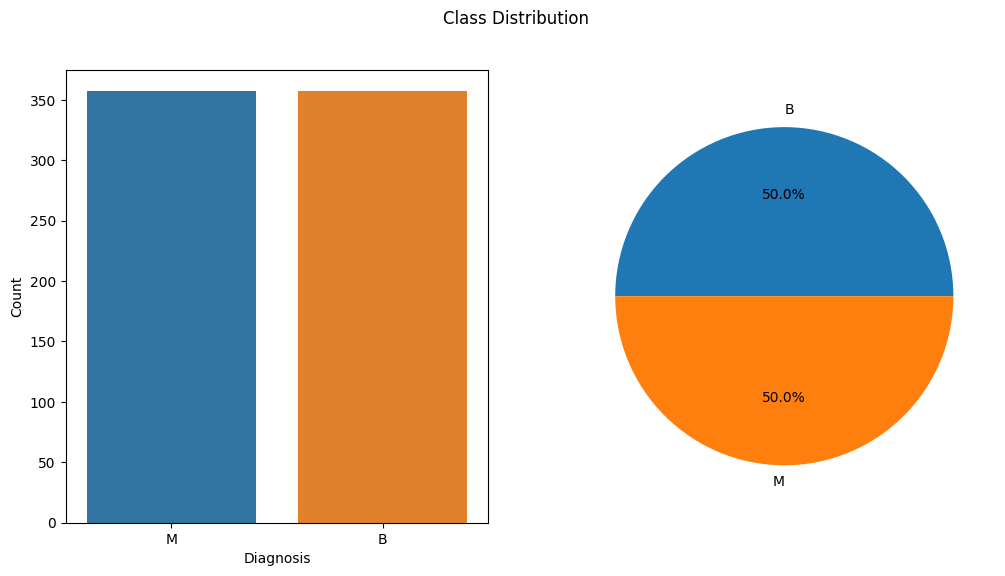

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.countplot(x='diagnosis', data=res2, ax=axes[0])
plt.pie(res2.groupby('diagnosis')['diagnosis'].count(), labels=['B','M'], autopct='%1.1f%%')

fig.suptitle('Class Distribution', fontsize=12)
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.show()

# Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X__res, y__res, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(571, 30)

# Recursive Feature Elimination(RFE)

In [ ]:

#Initializing the classifier & RFE module
estimator =XGBClassifier(n_estimators=200, max_depth=5, n_jobs=2)
selector = RFE(estimator, step=1)

start = perf_counter()
selector = selector.fit(X_train, y_train)#Fit the reduced features to the classifier
end = perf_counter()
execution_time_fit = (end - start)
print(f"'execution_time_fit='{execution_time_fit}")
    
start = perf_counter()
y_hat=selector.predict(X_test) #make prediction
end = perf_counter()
execution_time_predict= (end - start)
print(f"'execution_time_predict='{execution_time_predict}")
    
    #acc = metrics.accuracy_score(y_test, y_hat)#Check the performence

'execution_time_fit='2.4552429870000196
'execution_time_predict='0.0013522259999945163


In [ ]:
# summarize all features
for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 16.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 11.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 15.000
Column: 9, Selected False, Rank: 13.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 6.000
Column: 15, Selected False, Rank: 12.000
Column: 16, Selected False, Rank: 8.000
Column: 17, Selected False, Rank: 14.000
Column: 18, Selected False, Rank: 7.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selec

In [ ]:
estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
acc = metrics.accuracy_score(y_test, y_hat)#Check the performence

In [ ]:
acc

0.9790209790209791

# Classical approach

In [ ]:
def train_model(train_x, train_y, model_name='NB', Test=None):
    """
    Possible model names: ['RF', 'SVM', 'XGB', 'KNN']
    default = 'NB'
    
    validation: (val_x, val_y) tupple for validation accuracy score.
    
    return: trained model
    """
    model = None
    if model_name == 'SVM':
        model = svm.SVC(gamma='scale', probability=True)
    elif model_name == 'XGB':
        model = XGBClassifier(n_estimators=200, max_depth=5, n_jobs=2)
#         model = XGBClassifier()
    elif model_name == 'RF':
        model =RandomForestClassifier(n_estimators=200, max_depth=10)
    elif model_name == 'LR':
         model =LogisticRegression(C=.000001,class_weight='balanced') 
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    else:
        model = GaussianNB()
    
    model.fit(train_x, train_y)
    
    if Test is not None:
        y_hat = model.predict(Test[0])
        acc = metrics.accuracy_score(Test[1], y_hat)
        print(f"Test Accuracy in '{model_name}' = {acc}")
        #AUC=roc_auc_score(Test[1], y_hat, multi_class='ovr')
        #print(f"AUC score in '{model_name}' = {AUC}")
        Ham_Loss=hamming_loss(Test[1],y_hat)
        print(f"Hamming Loss in '{model_name}' = {Ham_Loss}")
 
        cm = metrics.confusion_matrix(Test[1], y_hat)
       # print(cm)
        recall = cm[0][0] / (cm[0][0] + cm[0][1])
        precision = cm[0][0] / (cm[0][0] + cm[1][0])
        f1 = 2*(precision*recall)/(precision+recall)
        print(f"Recall in '{model_name}' = {recall}")
        print(f"Precision in '{model_name}' = {precision}")
        print(f"F1 Score in '{model_name}' = {f1}")
        
             
    return model

In [ ]:
model1 = train_model(X_train, y_train, model_name='KNN', Test=(X_test,y_test))

Test Accuracy in 'KNN' = 0.958041958041958
Hamming Loss in 'KNN' = 0.04195804195804196
Recall in 'KNN' = 0.9696969696969697
Precision in 'KNN' = 0.9411764705882353
F1 Score in 'KNN' = 0.955223880597015


In [ ]:
model2 = train_model(np.asarray(X_train), y_train, model_name='XGB', Test=(np.asarray(X_test),y_test))

Test Accuracy in 'XGB' = 0.9790209790209791
Hamming Loss in 'XGB' = 0.02097902097902098
Recall in 'XGB' = 0.9545454545454546
Precision in 'XGB' = 1.0
F1 Score in 'XGB' = 0.9767441860465117


In [ ]:
model3 = train_model(X_train, y_train, model_name='SVM', Test=(X_test,y_test))

Test Accuracy in 'SVM' = 0.8811188811188811
Hamming Loss in 'SVM' = 0.11888111888111888
Recall in 'SVM' = 0.9545454545454546
Precision in 'SVM' = 0.8181818181818182
F1 Score in 'SVM' = 0.881118881118881


In [ ]:
model4 = train_model(X_train, y_train, model_name='RF', Test=(X_test,y_test))

Test Accuracy in 'RF' = 0.9790209790209791
Hamming Loss in 'RF' = 0.02097902097902098
Recall in 'RF' = 0.9545454545454546
Precision in 'RF' = 1.0
F1 Score in 'RF' = 0.9767441860465117


In [ ]:
model5 = train_model(X_train, y_train, model_name='LR', Test=(X_test,y_test))

Test Accuracy in 'LR' = 0.8951048951048951
Hamming Loss in 'LR' = 0.1048951048951049
Recall in 'LR' = 0.9696969696969697
Precision in 'LR' = 0.8311688311688312
F1 Score in 'LR' = 0.8951048951048951
